# 4. 数据预处理
1. 数据清洗
2. 数据集成
3. 数据变换
4. 数据规约

## 4.1 数据清洗
- 删除原始数据中的无关数据、重复数据、平滑噪声数据、与挖掘主题无关的数据、缺失值等
- 处理缺失值、异常值

### 4.1.1 缺失值处理
1. 删除记录
2. 数据插补
3. 不处理

#### 数据插补
1. 均值/中位数/众数
2. 固定值
3. 最近临插补   ：在记录中找到与缺失样本最接近的样本的该属性进行插补
4. 回归方法     
5. 插值法       ：利用已知点建立合适的插值函数$f(x)$，未知值由对应点$x_i$求出的函数值$f(x_i)$近似替代

`如果通过简单删除小部分记录达到既定的目标，那么删除含有缺失值的记录的方法是最有效的（但局限性很大）`

**插值法：** 
1. 拉格朗日插值法
2. 牛顿插值法
3. Hermite插值法
4. 分段插值法
5. 样条插值法

**（1）拉格朗日插值法**   
拉格朗日插值法是以法国十八世纪数学家约瑟夫·拉格朗日命名的一种多项式插值方法。许多实际问题中都用函数来表示某种内在联系或规律，而不少函数都只能通过实验和观测来了解。如对实践中的某个物理量进行观测，在若干个不同的地方得到相应的观测值，拉格朗日插值法可以找到一个多项式，其恰好在各个观测的点取到观测到的值。这样的多项式称为拉格朗日（插值）多项式。   
即对于平面上已知的$n$个点（无两点在一条直线上），可以找到一个$n-1$次多项式$y=a_0+a_1x+a_2x^2+...+a_{n-1}x^{n-1}$，使得此多项式曲线过这$n$个个点。  
1. 求已知的过$n$个点的$n-1$次多项式：  
$y=a_0+a_1x+a_2x^2+...+a_{n-1}x^{n-1}     （4.1）$   
将n个点的坐标$(x_1,y_1),(x_2,y_2),...,(x_n,y_n)$代入多项式函数得：  
$y_1=a_0+a_1x_1+a_2x_1^2+...+a_{n-1}x_{1}^{n-1}$  
$y_2=a_0+a_1x_2+a_2x_2^2+...+a_{n-1}x_{2}^{n-1}$  
...  
$y_n=a_0+a_1x_n+a_2x_n^2+...+a_{n-1}x_{n}^{n-1}$  
解出拉格朗日插值多项式为： （推导过程） 
$L(x) = y_1 \frac{(x-x_2)(x-x_3)...(x-x_n)}{(x_1-x_2)(x_1-x_3)...(x_1-x_n)} + y_2 \frac{(x-x_1)(x-x_3)...(x-x_n)}{(x_2-x_1)(x_2-x_3)...(x_2-x_n)} + ... + y_n \frac{(x-x_1)(x-x_2)...(x-x_{n-1})}{(x_n-x_1)(x_n-x_2)...(x_n-x_{n-1})} = \sum_{i=0}^{n}{y_i}\prod^{n}_{j=0,j\neq{i}}{\frac{x-x_j}{x_i-x_j}}$

In [1]:
!dir

 驱动器 F 中的卷没有标签。
 卷的序列号是 000B-2B23

 f:\CODE\AI\ai\2.入门课程\Python数据科学分析实战-中级\chapter4 数据预处理 的目录

2019/04/28  23:10    <DIR>          .
2019/04/28  23:10    <DIR>          ..
2019/04/23  18:39    <DIR>          .ipynb_checkpoints
2019/04/23  14:01    <DIR>          demo
2019/04/28  23:10            72,970 第4章 数据预处理.ipynb
               1 个文件         72,970 字节
               4 个目录 164,875,034,624 可用字节


In [2]:
import pandas as pd
from scipy.interpolate import lagrange # 导入拉格朗日函数

In [3]:
data = pd.read_excel("demo/data/catering_sale.xls")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 2 columns):
日期    201 non-null datetime64[ns]
销量    200 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.2 KB


In [4]:
data.head()

,日期,销量
0,2015-03-01,51.0
1,2015-02-28,2618.2
2,2015-02-27,2608.4
3,2015-02-26,2651.9
4,2015-02-25,3442.1


In [5]:
data.describe()

,销量
count,200.000000
mean,2755.214700
std,751.029772
min,22.000000
25%,2451.975000
50%,2655.850000
75%,3026.125000
max,9106.440000


In [6]:
data['销量'].plot()

In [7]:
# 过滤异常值
data['销量'][(data['销量'] < 400) | (data['销量'] > 5000)] = None

D:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [8]:
data.head()

,日期,销量
0,2015-03-01,NaN
1,2015-02-28,2618.2
2,2015-02-27,2608.4
3,2015-02-26,2651.9
4,2015-02-25,3442.1


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 2 columns):
日期    201 non-null datetime64[ns]
销量    195 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.2 KB


In [10]:
data[data[u'销量'].isnull()]

,日期,销量
0,2015-03-01,NaN
8,2015-02-21,NaN
14,2015-02-14,NaN
103,2014-11-08,NaN
110,2014-11-01,NaN
144,2014-09-27,NaN


In [11]:
#自定义列向量插值函数
#s为列向量，n为被插值的位置，k为取前后的数据个数，默认为5
def ployinterp_column(s,n,k=5):
    y = s[list(range(n-k, n)) + list(range(n+1, n+1+k))] #取数
    y = y[y.notnull()] # 剔除空值
    return lagrange(y.index,list(y))(n) #插值计算并返回插值结果

In [12]:
#逐个元素判断是否需要插值
for i in data.columns:
    for j in range(len(data)):
        if (data[i].isnull())[j]: #如果为空即插值。
            data[i][j] = ployinterp_column(data[i], j)

D:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\pandas\core\series.py:841: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]
D:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [13]:
# 根据索引查看数据
data.iloc[[0,8,14,103,110,144],:]

,日期,销量
0,2015-03-01,-291.400000
8,2015-02-21,4275.254762
14,2015-02-14,4156.860423
103,2014-11-08,96.000000
110,2014-11-01,6720.000000
144,2014-09-27,-75744.000000


## 拉格朗日插值法优点与缺点
拉格朗日插值法的公式结构整齐紧凑，在理论分析中十分方便，然而在计算中，当插值点增加或减少一个时，所对应的基本多项式就需要全部重新计算，于是整个公式都会变化，非常繁琐。这时可以用重心拉格朗日插值法或牛顿插值法来代替。此外，当插值点比较多的时候，拉格朗日插值多项式的次数可能会很高，因此具有数值不稳定的特点，也就是说尽管在已知的几个点取到给定的数值，但在附近却会和“实际上”的值之间有很大的偏差（如0,103,110，114）。这类现象也被称为龙格现象，解决的办法是分段用较低次数的插值多项式。例如重心拉格朗日插值法等。

## 异常值处理
1. 删除含有异常值的记录
2. 视为缺失值
3. 平均值修正：使用前后另两个观测值得平均值修正
4. 不处理

## 4.2 数据集成
将多个数据源合并存放在一个一致的数据存储中的过程。

### 4.2.1 实体识别
- 同名异义 ： 比如不同表的ID
- 异名同义 ： 
- 单位不统一

### 4.2.2 冗余属性识别
- 同一属性多次出现
- 同一属性命名不一致导致重复

## 4.3 数据变换

### 4.3.1 简单函数变换
数据压缩是常用的一种变换方式

### 4.3.2 规范化
1. 最小-最大规范化（离差标准化）    
$x^*=\frac{x-min}{max-min}$
2. 零-均值规范化    
$x^*=\frac{x-\overline{x}}{\sigma}$  
处理后的数据均值为0，标准差为1.$\sigma$为原始数据的标准差，是当前最常使用的方法
3. 小数定标规范化  
通过移动属性值的小数位数，将属性值映射到[-1,1]之间，移动的小数位数取决于属性值绝对值的最大值.   
$x^*=\frac{x}{10^k}$

In [14]:
import pandas as pd
import numpy as np

datafile = 'demo/data/normalization_data.xls' #参数初始化
data = pd.read_excel(datafile, header = None) #读取数据
data

,0,1,2,3
0,78,521,602,2863
1,144,-600,-521,2245
2,95,-457,468,-1283
3,69,596,695,1054
4,190,527,691,2051
5,101,403,470,2487
6,146,413,435,2571


In [15]:
(data - data.min())/(data.max() - data.min()) #最小-最大规范化

,0,1,2,3
0,0.074380,0.937291,0.923520,1.000000
1,0.619835,0.000000,0.000000,0.850941
2,0.214876,0.119565,0.813322,0.000000
3,0.000000,1.000000,1.000000,0.563676
4,1.000000,0.942308,0.996711,0.804149
5,0.264463,0.838629,0.814967,0.909310
6,0.636364,0.846990,0.786184,0.929571


In [16]:
(data - data.mean())/data.std() #零-均值规范化

,0,1,2,3
0,-0.905383,0.635863,0.464531,0.798149
1,0.604678,-1.587675,-2.193167,0.369390
2,-0.516428,-1.304030,0.147406,-2.078279
3,-1.111301,0.784628,0.684625,-0.456906
4,1.657146,0.647765,0.675159,0.234796
5,-0.379150,0.401807,0.152139,0.537286
6,0.650438,0.421642,0.069308,0.595564


In [17]:
data/10**np.ceil(np.log10(data.abs().max())) #小数定标规范化

,0,1,2,3
0,0.078,0.521,0.602,0.2863
1,0.144,-0.600,-0.521,0.2245
2,0.095,-0.457,0.468,-0.1283
3,0.069,0.596,0.695,0.1054
4,0.190,0.527,0.691,0.2051
5,0.101,0.403,0.470,0.2487
6,0.146,0.413,0.435,0.2571


### 4.3.3 连续属性离散化
一些数据挖掘算法，特别是某些分类算法（如ID3、Apriori算法等），要求数据是分类属性形式。这样就要求将连续属性转换为分类属性，即连续属性离散化。

#### 1. 离散化的过程
离散化就是在数据的取值范围内设定若干个离散的划分点，来设定离散化的区间，最后用不同的符号或者整数代表落在每个子区间中的数据值。    
所以，离散化涉及两个子任务：
1. 确定分类数
2. 如何将连续属性值映射到这些分类值

#### 2. 常用的离散化方法
1. 等宽法：将值域分成具有相同宽度的区间

区间的个数由数据本身的特点决定，或者由用户指定
2. 等频法：将相同数量的记录放入每个区间

这两种方法简单、便于操作，但是都需要人为划定区间个数。

但是等宽法的缺点在于他对离群点比较敏感，倾向于不均匀的把属性值分布到各个区间。有些区间的数据很多，但有些区间的数据极少，这样会严重损坏建立的决策模型。

等频法虽然避免了上述去电，但却有可能将相同的数据值分到不同的区间以满足每个区间中固定的数据个数。
3. 基于聚类分析的方法：

一维聚类的方法包括两个步骤：
- 将连续属性的值用聚类算法（K-means）进行聚类
- 将聚类得到的簇进行处理，合并到一个簇的连续属性值并做同一标记。

该方法（不一定）也需要用户指定簇的个数，从而决定产生的区间数


In [18]:
#数据规范化
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans #引入KMeans
datafile = 'demo/data/discretization_data.xls' #参数初始化
data = pd.read_excel(datafile) #读取数据
data = data[u'肝气郁结证型系数'].copy()
k = 4

In [19]:
def cluster_plot(d, k): #自定义作图函数来显示聚类结果
    plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
    plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号
  
    plt.figure(figsize = (8, 3))
    for j in range(0, k):
        plt.plot(data[d==j], [j for i in d[d==j]], 'o')
  
    plt.ylim(-0.5, k-0.5)
    return plt

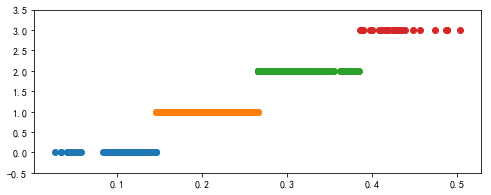

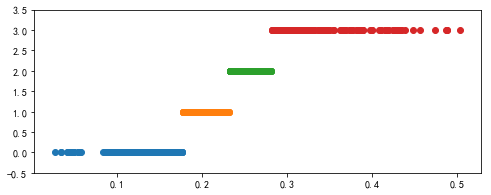

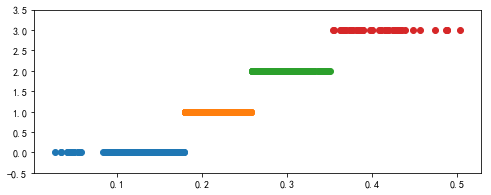

In [20]:
d1 = pd.cut(data, k, labels = range(k)) #等宽离散化，各个类比依次命名为0,1,2,3

#等频率离散化
w = [1.0*i/k for i in range(k+1)]
w = data.describe(percentiles = w)[4:4+k+1] #使用describe函数自动计算分位数
w[0] = w[0]*(1-1e-10)
d2 = pd.cut(data, w, labels = range(k))


kmodel = KMeans(n_clusters = k, n_jobs = 4) #建立模型，n_jobs是并行数，一般等于CPU数较好
kmodel.fit(data.values.reshape((len(data), 1))) #训练模型
c = pd.DataFrame(kmodel.cluster_centers_).sort_values(0) #输出聚类中心，并且排序（默认是随机序的）

w = c.rolling(2).mean().iloc[1:]#相邻两项求中点，作为边界点
w = [0] + list(w[0]) + [data.max()] #把首末边界点加上
d3 = pd.cut(data, w, labels = range(k))


cluster_plot(d1, k).show()
cluster_plot(d2, k).show()
cluster_plot(d3, k).show()


### 4.3.4 属性构造

在数据挖掘过程中，为了提取更有用的信息，挖掘更深层次的模式，提高挖掘结果的精度，需要利用已有的属性集构造出新的属性，并加入到现有的集合中。

即：根据已有属性构造出更符合需要的新属性

举例：
1. 将泰坦尼克数据集中的配偶兄妹属性和父母子女属性合并，得到家庭规模这一新属性
2. 进行防窃电、漏电诊断建模时，由于电能损耗的存在，理论上供入电量应略大于供出电量。因此可以构造一个新指标--线损率。

$ 线损率 = \frac{供入电量-供出电量}{供入电量}$

可以构造线损率代码如下

In [21]:
import pandas as pd

#参数初始化
inputfile= 'demo/data/electricity_data.xls' #供入供出电量数据
outputfile = 'demo/tmp/electricity_data.xls' #属性构造后数据文件

data = pd.read_excel(inputfile) #读入数据
data[u'线损率'] = (data[u'供入电量'] - data[u'供出电量'])/data[u'供入电量']

data.to_excel(outputfile, index = False) #保存结果

## 4.4 数据规约
数据归约是指在尽可能保持数据原貌的前提下，最大限度地精简数据量（完成该任务的必要前提是理解挖掘任务和熟悉数据本身内容），从而提高数据分析和挖掘的效率。

数据规约的意义在于：

1. 降低无效、错误数据对建模的影响、
2. 少量且具有代表性的数据将大幅缩减数据挖掘需要的时间
3. 降低存储数据的成本。

数据归约主要有两个途径：属性选择（规约）和数据采样（规约），分别针对原始数据集中的属性和记录。

### 4.4.1 属性规约

属性规约的目的是寻找出最小的属性子集，将数据集中不相关、弱相关或冗余的属性或维被检测或删除，并把原始数据变换或投影到较小的空间，同时确保新数据子集的概率分布尽可能地接近原来数据集的概率分布。

属性规约的常用方法有：

1. 数据立方体聚集(合并属性)   

` 类似于前面的数据聚集，对数据立方体进行上卷和下钻，在不同抽象层次进行分析,即将一些旧属性合并为新属性`

2. 属性子集选择

2.1 逐步向前选择

` 从一个空属性集开始，每次从原来属性集合中选择一个当前最优的属性添加到当前属性子集中，直到无法选择出最优属性或者满足一定阈值约束为止。`

2.2 逐步向后删除

` 从一个全属性集开始，每次从原来属性集合中选择一个当前最差的属性添加到当前属性子集中删除，直到无法选择出最差属性或者满足一定阈值约束为止。`

2.3 决策树归纳

` 利用决策树的归纳方法对初始数据进行分类归纳学习，获得一个初始决策树，所有没有出现在这个决策树上的属性均可以认为是无关属性，因此将这些属性从初始集合中删除，就可以获得一个较优的属性子集。`

` 每个非叶子节点表示一个属性的选择，每个叶子节点表示一个类预测。最终的结果是将属性按照需求划分为好的或坏的。`

3. 维度规约：使用数据编码和变换，规约数据。

3.1 主成分分析

` 用较少的变量去解释原始数据中的大部分变量，即将许多相关性很高的变量转化为彼此相互独立或者不相关的变量。`

原理：求取协方差矩阵的特征值和特征向量。根据一定放入规则选取特征值较大的特征向量组成模式矢量。

3.2 小波变换

` 能够刻画某个问题的特征往往隐含在一个信号中的某个或者某些分量重，小波变换可以把非平稳信号分解为表达不同层次、不同频带信息的数据序列，即小波系数。选择适当的小波系数，即完成了信号的特征提取。`

原理：通过小波变换将原始数据向量X={xi,x2...}(对应元祖各个属性)，变换成不同数值的数值小波系数向量Y。然后按照某种规则截取Y，仅保存一部分最强的小波系数。


In [22]:
#主成分分析 降维
import pandas as pd

#参数初始化
inputfile = 'demo/data/principal_component.xls'
outputfile = 'demo/tmp/dimention_reducted.xls' #降维后的数据

data = pd.read_excel(inputfile, header = None) #读入数据
data.head()

,0,1,2,3,4,5,6,7
0,40.4,24.7,7.2,6.1,8.3,8.7,2.442,20.0
1,25.0,12.7,11.2,11.0,12.9,20.2,3.542,9.1
2,13.2,3.3,3.9,4.3,4.4,5.5,0.578,3.6
3,22.3,6.7,5.6,3.7,6.0,7.4,0.176,7.3
4,34.3,11.8,7.1,7.1,8.0,8.9,1.726,27.5


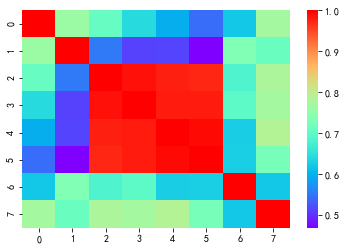

In [23]:
import seaborn as sns
sns.heatmap(data.corr(),cmap='rainbow')

In [24]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(data)
pca.components_ #返回模型的各个特征向量

array([[ 0.56788461,  0.2280431 ,  0.23281436,  0.22427336,  0.3358618 ,
         0.43679539,  0.03861081,  0.46466998],
       [ 0.64801531,  0.24732373, -0.17085432, -0.2089819 , -0.36050922,
        -0.55908747,  0.00186891,  0.05910423],
       [-0.45139763,  0.23802089, -0.17685792, -0.11843804, -0.05173347,
        -0.20091919, -0.00124421,  0.80699041],
       [-0.19404741,  0.9021939 , -0.00730164, -0.01424541,  0.03106289,
         0.12563004,  0.11152105, -0.3448924 ],
       [-0.06133747, -0.03383817,  0.12652433,  0.64325682, -0.3896425 ,
        -0.10681901,  0.63233277,  0.04720838],
       [ 0.02579655, -0.06678747,  0.12816343, -0.57023937, -0.52642373,
         0.52280144,  0.31167833,  0.0754221 ],
       [-0.03800378,  0.09520111,  0.15593386,  0.34300352, -0.56640021,
         0.18985251, -0.69902952,  0.04505823],
       [-0.10147399,  0.03937889,  0.91023327, -0.18760016,  0.06193777,
        -0.34598258, -0.02090066,  0.02137393]])

可以看到通过PCA求得的8个特征向量，特征向量代表了你选择的空间方向，在这个空间方向上，你的样本在这个方向的样本方差就是其中的特征值，因此特征值越大代表了在这个方向上的数据主成份“含量越大”。

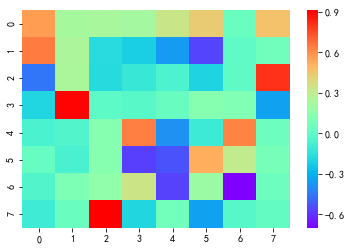

In [25]:
sns.heatmap(pca.components_,cmap='rainbow')

In [26]:
pca.explained_variance_ratio_ #返回各个成分各自的方差百分比

array([7.74011263e-01, 1.56949443e-01, 4.27594216e-02, 2.40659228e-02,
       1.50278048e-03, 4.10990447e-04, 2.07718405e-04, 9.24594471e-05])

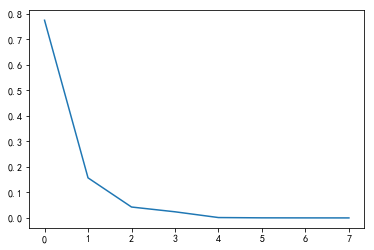

In [27]:
import matplotlib.pyplot as plt
plt.plot(pca.explained_variance_ratio_)

In [28]:
sum(pca.explained_variance_ratio_[:4]) #返回各个成分各自的方差百分比

0.9977860512171647

可以看出取前4个主成分时，累计贡献率已经达到了99%，因此可以重新建立PCA模型

In [29]:
pca = PCA(4)
pca.fit(data)
low_d = pca.transform(data) # 降低维度并应用于data
low_d

array([[  8.19133694,  16.90402785,   3.90991029,   7.48106686],
       [  0.28527403,  -6.48074989,  -4.62870368,   5.01369607],
       [-23.70739074,  -2.85245701,  -0.4965231 ,  -1.57285727],
       [-14.43202637,   2.29917325,  -1.50272151,  -1.30763061],
       [  5.4304568 ,  10.00704077,   9.52086923,  -5.63779544],
       [ 24.15955898,  -9.36428589,   0.72657857,  -1.98622218],
       [ -3.66134607,  -7.60198615,  -2.36439873,   0.04213184],
       [ 13.96761214,  13.89123979,  -6.44917778,  -2.92916826],
       [ 40.88093588, -13.25685287,   4.16539368,   1.21239981],
       [ -1.74887665,  -4.23112299,  -0.58980995,  -1.57477365],
       [-21.94321959,  -2.36645883,   1.33203832,   4.39763606],
       [-36.70868069,  -6.00536554,   3.97183515,  -1.54808393],
       [  3.28750663,   4.86380886,   1.00424688,   0.85119303],
       [  5.99885871,   4.19398863,  -8.59953736,  -2.44159234]])

可以看到原始数据从8维降到了4维，且占据了99%以上的信息。

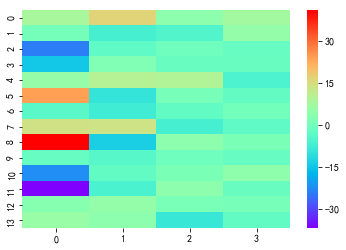

In [30]:
sns.heatmap(low_d,cmap='rainbow')

In [31]:
#保存降维后的数据
pd.DataFrame(low_d).to_excel(outputfile)
#查看数据，对比数据和原数据

In [32]:
#利用小波分析进行特征分析（不讲，留为作业）

#参数初始化
inputfile= 'demo/data/leleccum.mat' #提取自Matlab的信号文件

from scipy.io import loadmat #mat是MATLAB专用格式，需要用loadmat读取它
mat = loadmat(inputfile)
signal = mat['leleccum'][0]

import pywt #导入PyWavelets
coeffs = pywt.wavedec(signal, 'bior3.7', level = 5)
#返回结果为level+1个数字，第一个数组为逼近系数数组，后面的依次是细节系数数组
coeffs

[array([2415.1478541 , 2395.74470824, 2402.22022728, 2408.90987352,
        2402.22022728, 2395.74470824, 2415.1478541 , 2369.53622493,
        1958.0913368 , 1983.87619596, 1901.68851538, 1651.86483216,
        1482.45129628, 1356.98779058, 1257.4459793 , 1265.75505172,
        1363.66712581, 1427.53767222, 1568.87951307, 1893.80694993,
        2295.89161125, 2555.9239482 , 2778.31817145, 2871.0940301 ,
        2954.38189098, 2981.0281365 , 2986.06286012, 3091.56214184,
        3085.0678644 , 2840.05639099, 2782.74679521, 2776.99922688,
        2833.0658032 , 2907.76710805, 2496.58749928, 2443.95791914,
        2338.50723857, 2394.15834442, 2186.86013504, 2142.10730351,
        2066.37469747, 2097.47366057, 2190.20987484, 2024.82470966,
        1999.88792082, 1761.22260043, 2012.8983115 , 1733.14320566,
        1955.69105593, 2296.53399998, 2332.11621828, 2436.91433782,
        2248.43497823, 1928.01215666, 1900.73383661, 1804.08152916,
        1596.93576991, 1375.26325034, 1301.52662

### 4.4.2 数值规约

对大规模数据库内容进行复杂的数据分析通常需要耗费大量的时间。数据规约技术用于帮助从原有庞大数据集中获得一个精简的数据集合，并使用这一精简数据集保持原有数据集的完整性，这样在精简数据集上进行数据挖掘效率更高，并且挖掘出来的结果与使用原有数据集所获得的结果基本相同

总结：用替代的、较小的数据表示形式换原始数据。

方法可以是参数或者非参数的。

- 对于参数方法而言，使用模型估计数据，使得一般只需要存放模型参数而不是实际数据（离群点需存放）。

- 非参数方法包括：回归、直方图、聚类、抽样等。

(1)回归或对数线性模型

    多元线性回归：

        原理：通过模型建立属性间的关系，并通过回归方程等进行拟合，求取相关的参数，这样在存取的时候只需要存取相关的模型参数，而不用存取实际数据，从而减少数据量。

    对数线性模型：

        原理：主要针对于近似离散的多维数据进行概率分布。详解见后面。

（2）直方图

    用一个连续的值域代替一个值作为一个桶（给定属性的连续区间）。

    桶和属性的划分：

        a.等宽。每个桶的宽度区间是一样的。

        b.等频。每个桶的高度是一样的。

        c.V最优。在桶的个数一定的条件下，具有最小方差的直方图即为V最优直方图。其中，直方图的方差是每个桶代表的原来值的加权和，其中权等于桶中值的个数。

        d.MaxDiff。最大化差异度量。考虑每个相邻值（相邻值）之间的差，每个桶的属性值边界是x-1个最大差的对。x为用户指定的桶数。

（3）聚类

    对数据对象进行划分成群或簇，规则是是每个簇内数据对象尽量相似，簇之间的对象尽量相异。然后使用簇来替换原始的簇内数据对象。

（4）抽样

    a.s个样本无放回简单随机抽样

    b.s个样本有放回简单随机抽样。

    c.聚类抽样。先将N个元祖分成M个互补相交的簇，然后对其进行S个簇的简单随机抽样。

    d.分层抽样。实际相当于先对原始数据进行直方图划分，然后对每一个桶进行抽样，在综合起来。

    抽样规约的优点：得到样本的花费正比于样本集的大小，而不是总数据集的大小。抽样的复杂度仅随数据的维数成线性增长，其他的更多随数据的维数成指数增长。
    

## PYTHON主要数据预处理函数

- interpolate 一维、高维数据插值  scipy
- unique      去除数据中的重复元素  pandas/numpy
- isnull      判断空值            pandas
- notnull     判断是否非空值   pandas
- PCA 对指标变量矩阵进行主成分分析 scikit-learn
- random 生成随机值/矩阵 numpy